## 5.2 波動関数の変分計算

In [1]:
# 学習用データ
import numpy as np
from numpy import pi,sin,sqrt

N=3000
x=np.linspace(0,1,N)
dummy=np.sqrt(2)*np.sin(np.pi*x)

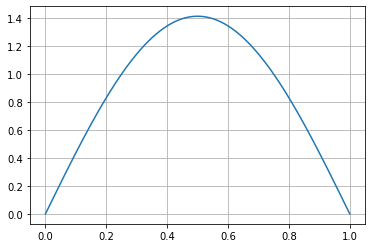

In [2]:
# dummyは「正解」の関数
import matplotlib.pyplot as plt

plt.plot(x,dummy)
plt.grid()
plt.show()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

In [4]:
def psi(y):
    y_rev=K.reverse(y,0)
    y_symmertrized=y+y_rev-y[0]-y[-1]
    return y_symmertrized

In [5]:
# 境界条件を満たすか？
x=np.arange(10)
y=np.sin(x)
print(y)
print(psi(y))

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
tf.Tensor(
[ 0.          1.41871075  1.15416554 -0.55041398 -2.12784526 -2.12784526
 -0.55041398  1.15416554  1.41871075  0.        ], shape=(10,), dtype=float64)


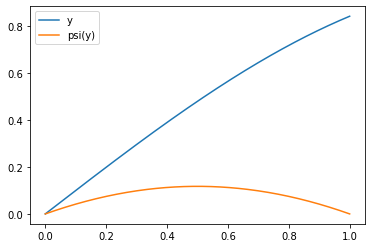

In [6]:
x=np.linspace(0,1,300)
y=np.sin(x)
# y=x**2
plt.plot(x,y,label="y")
plt.plot(x,psi(y),label="psi(y)")
plt.legend()
plt.show()

In [7]:
def dpsi(y):
    y_shifted_f=tf.roll(y,shift=-1,axis=0)
    y_shifted_b=tf.roll(y,shift=+1,axis=0)
    dy=(y_shifted_f-y_shifted_b)/2
    return dy

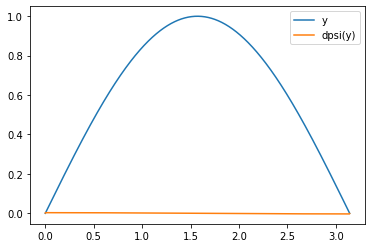

In [8]:
# 微分できてるか
x=np.linspace(0,np.pi,1000)
# print(dpsi(y))
y=np.sin(x)
plt.plot(x,y,label="y")
plt.plot(x,dpsi(y),label="dpsi(y)")

plt.legend()
plt.show()
# plt.plot(x,psi(y))
# plt.plot(x,dpsi(x))

In [16]:
def variationalE(y_true,y_pred):
    # 境界条件
    # wave=psi(y_pred)
    wave=y_pred
    wave_nom=K.l2_normalize(wave,0)
    dwave=dpsi(wave_nom)

    # ペナルティ項を加える
    return N**2*K.sum(K.square(dwave))/pi**2+10*N**2*y_pred[0]**2+10*N**2*y_pred[-1]**2
    

In [17]:
# 学習用データ
N=3000
x=np.linspace(0,1,N)
dummy=np.sqrt(2)*np.sin(np.pi*x)

In [18]:
model=Sequential()
model.add(Dense(32,input_dim=1,activation='sigmoid'))
model.add(Dense(1,activation='linear'))

model.compile(loss=variationalE,optimizer='Adam')

# オンライン学習
results=model.fit(x,dummy,epochs=3000,steps_per_epoch=1,verbose=0,shuffle=False)

94/94 [==============================] - 1s 3ms/step


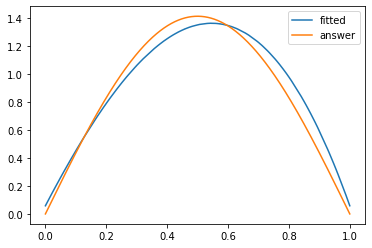

In [19]:
pred=model.predict(x)
# 波動関数そのものは規格化していなかった！
func=pred #対象化しない
func=np.abs(func)/np.sqrt(np.sum(func**2)/N) #規格化
# plt.xlim(0,1)
# plt.plot(x,pred,label='fitted')
plt.plot(x,func,label='fitted')
plt.plot(x,dummy,label='answer')
plt.legend()
# plt.savefig("wavefunc_by_dl.png")
plt.show()

In [18]:
print(np.sum(func))

2750.0168


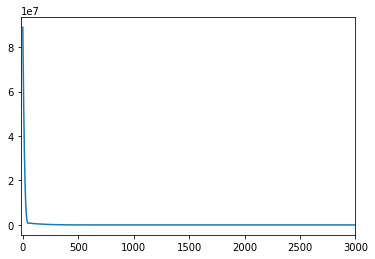

In [20]:
# 学習曲線
loss=results.history['loss']
plt.xlim(-20,3000)
plt.plot(loss)
# plt.savefig("curve_wavefunc.png")
plt.show()

In [15]:
print(params[1][1])

0.09219304


In [16]:
def sigmoid(x):
  return np.exp(np.minimum(0,x))/(1+np.exp(-np.abs(x)))

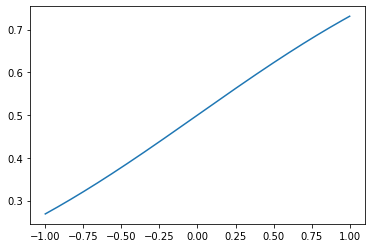

In [17]:
# x=np.linspace(-10,10,1000)
plt.plot(x,sigmoid(x))
plt.show()



No handles with labels found to put in legend.


[array([[-1.1532168, -0.8756616]], dtype=float32), array([0.44350323, 0.09219304], dtype=float32), array([[-0.29802853],
       [ 0.15853845]], dtype=float32), array([-0.01872064], dtype=float32)]


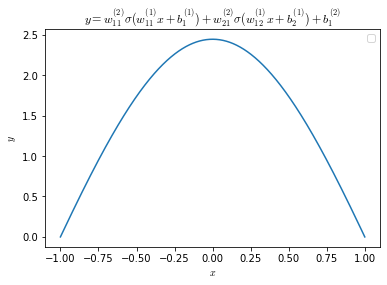

In [50]:
params=model.get_weights()
print(params)
# print(params[0][0][1])

x=np.linspace(-1,1,1000)
z_1=sigmoid(params[0][0][0]*x+params[1][0])
z_2=sigmoid(params[0][0][1]*x+params[1][1])
y=params[2][0]*z_1+params[2][1]*z_2+params[3][0]
# z_1=psi(z_1)
# z_1=np.abs(z_1)/np.sqrt(np.sum(z_1**2)/N)
# z_2=psi(z_2)
# z_2=np.abs(z_2)/np.sqrt(np.sum(z_2**2)/N)
y=psi(y)
y=np.abs(y)/np.sqrt(np.sum(y**2)/N)
# plt.plot(x,z_1, label='z_1')
# plt.plot(x,z_2, label='z_2')
plt.plot(x,y)
plt.title("$y=w_{11}^{(2)} \sigma{(w_{11}^{(1)} x+b_{1}^{(1)})}+w_{21}^{(2)} \sigma{(w_{12}^{(1)} x+b_{2}^{(1)})}+b_{1}^{(2)}$",math_fontfamily='cm')
plt.xlabel("$x$",math_fontfamily='cm')
plt.ylabel("$y$",math_fontfamily='cm')
# plt.grid()
plt.legend()
# plt.savefig("check.png")
plt.show()

In [15]:
#モデルを保存する
model.save('image-classification.h5')

In [21]:
from tensorflow.keras.models import load_model

# #モデルを読み込み
# model = load_model('image-classification.h5')
# # model.summary()

ValueError: Unknown loss function: 'variationalE'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

C:\Users\syanase\AppData\Local\Temp/ipykernel_1916/1424635072.py:240: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


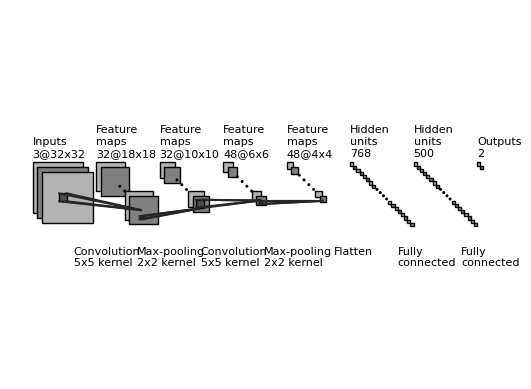

In [13]:
"""
Copyright (c) 2017, Gavin Weiguang Ding
All rights reserved.

Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
    list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
    this list of conditions and the following disclaimer in the documentation
    and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors
    may be used to endorse or promote products derived from this software
    without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
    IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
    ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE
    LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
    CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
    SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
    INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
    CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
    ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
    POSSIBILITY OF SUCH DAMAGE.
"""


import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.


def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
                            loc_diff=[3, -3],
                            ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(
                Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.5))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff,
                                     size[1], size[0]))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, end_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                    - start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0])]
                   )




    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) * np.array(
            loc_diff_list[ind_bgn + 1]) \
        + np.array([end_ratio[0] * size_list[ind_bgn + 1][1],
                    - end_ratio[1] * size_list[ind_bgn + 1][0]])


    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0]))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)



def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


if __name__ == '__main__':

    fc_unit_size = 2
    layer_width = 40
    flag_omit = True

    patches = []
    colors = []

    fig, ax = plt.subplots()


    ############################
    # conv layers
    size_list = [(32, 32), (18, 18), (10, 10), (6, 6), (4, 4)]
    num_list = [3, 32, 32, 48, 48]
    x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
    text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
    loc_diff_list = [[3, -3]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)-1,-1,-1):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumConvMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
            num_list[ind], size_list[ind][0], size_list[ind][1]))

    ############################
    # in between layers
    start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    patch_size_list = [(5, 5), (2, 2), (5, 5), (2, 2)]
    ind_bgn_list = range(len(patch_size_list))
    text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']

    for ind in range(len(patch_size_list)):
        add_mapping(
            patches, colors, start_ratio_list[ind], end_ratio_list[ind],
            patch_size_list[ind], ind,
            top_left_list, loc_diff_list, num_show_list, size_list)
        label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
            patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
        )


    ############################
    # fully connected layers
    size_list = [(fc_unit_size, fc_unit_size)] * 3
    num_list = [768, 500, 2]
    num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
    x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
    loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
    text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

    for ind in range(len(size_list)):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumFcMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind],
                      loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}'.format(
            num_list[ind]))

    text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

    for ind in range(len(size_list)):
        label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color * np.ones(3))
        if isinstance(patch, Line2D):
            ax.add_line(patch)
        else:
            patch.set_edgecolor(Black * np.ones(3))
            ax.add_patch(patch)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    fig.set_size_inches(8, 2.5)

    fig_dir = './'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
                bbox_inches='tight', pad_inches=0)
